In [ ]:
import os
import gc
import time
import math
import datetime
from math import log, floor
from sklearn.neighbors import KDTree

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.utils import shuffle
from tqdm.notebook import tqdm as tqdm

import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


In [ ]:
os.chdir("D:\\IITK\\3rd_sem\\time series\\project")

In [ ]:
sales_train_val = pd.read_csv("sales_train_validation.csv")
data = sales_train_val
data

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [ ]:
d_cols = [col for col in data.columns if 'd_' in col]

def sales_plot(catagory, state, item):

    df = data[(data['cat_id'] == catagory) & (data['state_id'] == state)]
    ids = sorted(list(set(df['id'])))

    x = df.loc[df['id'] == ids[item]].set_index('id')[d_cols].values[0]

    fig = go.Figure(go.Scatter(x = np.arange(len(x)),
                               y = x,
                               showlegend = False,
                               mode = 'lines',
                               name = "First sample",
                               marker = dict(color = "mediumseagreen")))

    fig.update_layout(height = 500, width = 900, title_text = ids[item])
    fig.show()

In [ ]:
sales_plot('FOODS', 'TX' ,7)

NameError: ignored

In [ ]:
def store_sales(store):
    df = data[data['store_id'] == store]
    total_sales = df[d_cols].sum()

    fig = go.Figure()
    fig.add_trace(go.Scatter(x = np.arange(len(total_sales)), y = total_sales, name = store))
    fig.update_layout(yaxis_title = 'Sales', xaxis_title = 'Time', title = ('Total Sales vs. Time of ' + store))
    fig.show()

In [ ]:
store_sales("CA_1")

In [ ]:
# Plot ACF and PACF for model order selection
plot_acf(train_data['Differenced'].dropna())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(train_data['Differenced'].dropna())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
calendar = pd.read_csv("calendar.csv")
total_sales = data[d_cols].sum()
df_store = pd.DataFrame({"Date": calendar['date'].iloc[:1913].tolist(), "Sales": total_sales}) # "MA": MA_sales
df_store.set_index('Date', inplace = True)
df_store

,Sales
Date,
2011-01-29,32631
2011-01-30,31749
2011-01-31,23783
2011-02-01,25412
2011-02-02,19146
...,...
2016-04-20,35343
2016-04-21,35033
2016-04-22,40517


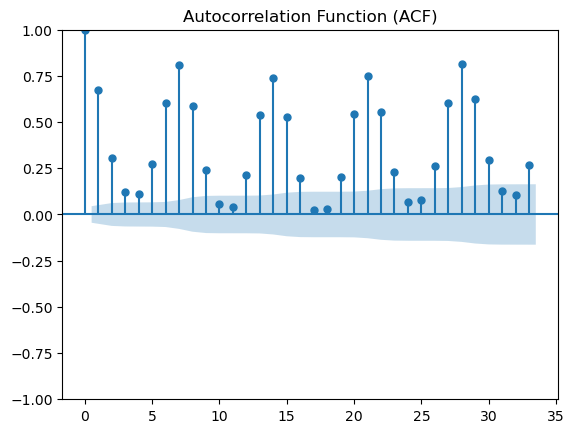

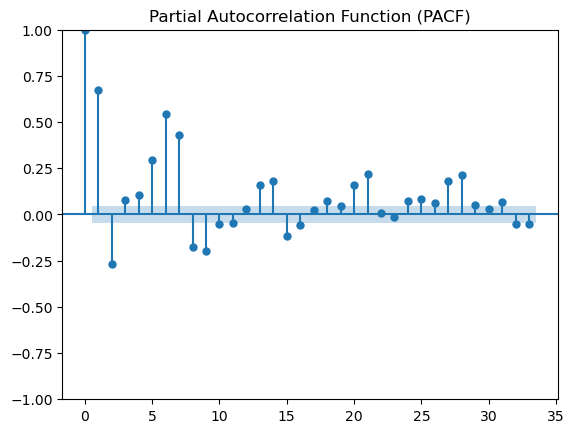

In [ ]:
# Plot ACF and PACF for model order selection
plot_acf(df_store['Sales'])
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df_store['Sales'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
df_store.index = pd.to_datetime(df_store.index)
df_monthly = df_store.resample('1M').mean()
df_monthly

,Sales
Date,
2011-01-31,29387.666667
2011-02-28,25941.964286
2011-03-31,24631.193548
2011-04-30,24590.433333
2011-05-31,23211.677419
...,...
2015-12-31,36330.193548
2016-01-31,39202.774194
2016-02-29,41825.068966


In [ ]:
df_monthly['MA'] = df_monthly['Sales'].rolling(12).mean()
df_monthly['EWMA'] = df_monthly['Sales'].ewm(span = 12, adjust = False).mean()
df_monthly['detrended'] = df_monthly['Sales'] - df_monthly['EWMA']

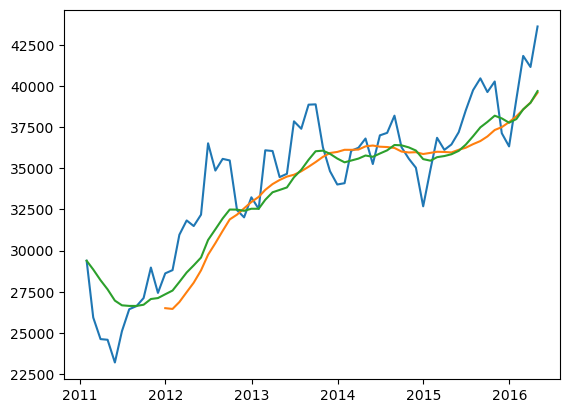

In [ ]:
plt.plot(df_monthly)
plt.show()

In [ ]:
fig = go.Figure()

for col in df_monthly.columns:
    fig.add_trace(go.Scatter(x = np.arange(len(df_monthly[col])), y = df_monthly[col], name = col))

fig.update_layout(yaxis_title = 'Monthly Sales', xaxis_title = 'Time')
fig.show()

In [ ]:
#friedman's test
from scipy.stats import rankdata
ranks_table = []
for i in range(0, 49, 12):
    temp = []
    for j in range(12):
        temp.append(df_monthly['Detrended'].iloc[i+j])
    ranks = rankdata(temp)
    ranks_table.append(ranks)
ranks_table = np.array(ranks_table)
ranks_table
M = np.sum(ranks_table, axis = 0)
X = np.sum((M - 32.5)**2) / 65
X

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
sales_train_eval = pd.read_csv("sales_train_evaluation.csv")
df = sales_train_eval[sales_train_eval['store_id'] == 'CA_1']
total_sales = df[d_cols].sum()
df_store = pd.DataFrame({'Day': range(1, 1942), "Sales": total_sales})
#df_store = pd.DataFrame({"Date": calendar['date'].iloc[:1913].tolist(), "Sales": total_sales}) # "MA": MA_sales


In [ ]:
df_store

,Day,Sales
d_1,1,4337
d_2,2,4155
d_3,3,2816
d_4,4,3051
d_5,5,2630
...,...,...
d_1937,1937,3995
d_1938,1938,4136
d_1939,1939,4433
d_1940,1940,5764


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,FOODS_3_823_CA_1_evaluation,FOODS_3_823,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,3,0,3,1,0,2,4,3,4,2
3045,FOODS_3_824_CA_1_evaluation,FOODS_3_824,FOODS_3,FOODS,CA_1,CA,1,0,5,0,...,0,0,0,1,2,0,3,0,0,0
3046,FOODS_3_825_CA_1_evaluation,FOODS_3_825,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,0,0,0,2,0,2,0,3,0,1
3047,FOODS_3_826_CA_1_evaluation,FOODS_3_826,FOODS_3,FOODS,CA_1,CA,0,0,0,0,...,0,1,2,1,3,3,0,1,2,1


In [ ]:
d_cols = [col for col in sales_train_eval.columns if 'd_' in col]

In [ ]:
df[d_cols]

,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,0,0,0,0,0,0,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,0,0,0,0,0,0,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3044,0,0,0,0,0,0,0,0,0,0,...,4,0,2,1,0,2,0,4,1,1
3045,1,0,5,0,0,3,0,0,2,1,...,1,0,0,0,1,0,2,2,1,0
3046,0,0,0,0,0,0,0,1,2,1,...,1,2,0,0,1,1,0,1,3,2
3047,0,0,0,0,0,0,0,0,0,0,...,1,0,4,0,2,0,0,3,2,0


In [ ]:
train_data = df_store.iloc[0:1359, ]
test_data = df_store.iloc[1360:1941, ]

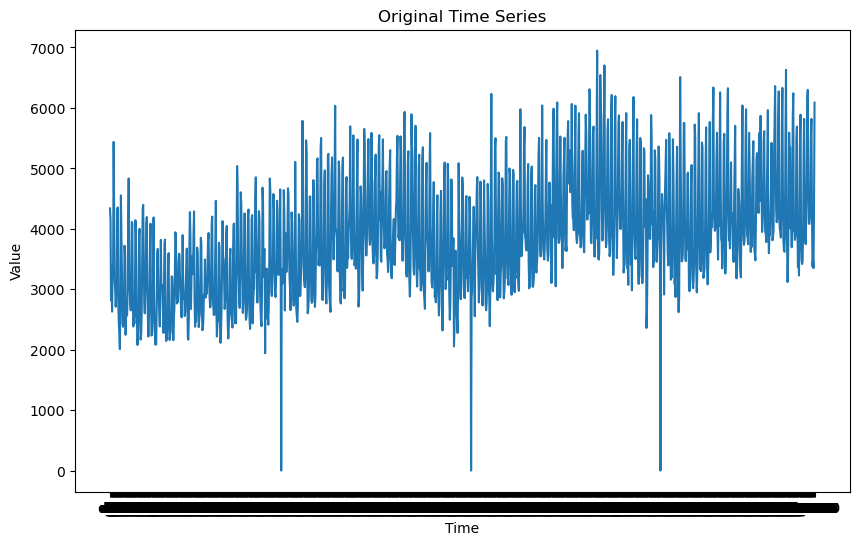

ADF Statistic: -1.969687848435223
p-value: 0.30001998748170444
Critical Values: {'1%': -3.4352614901385388, '5%': -2.863709037790883, '10%': -2.5679248018719276}


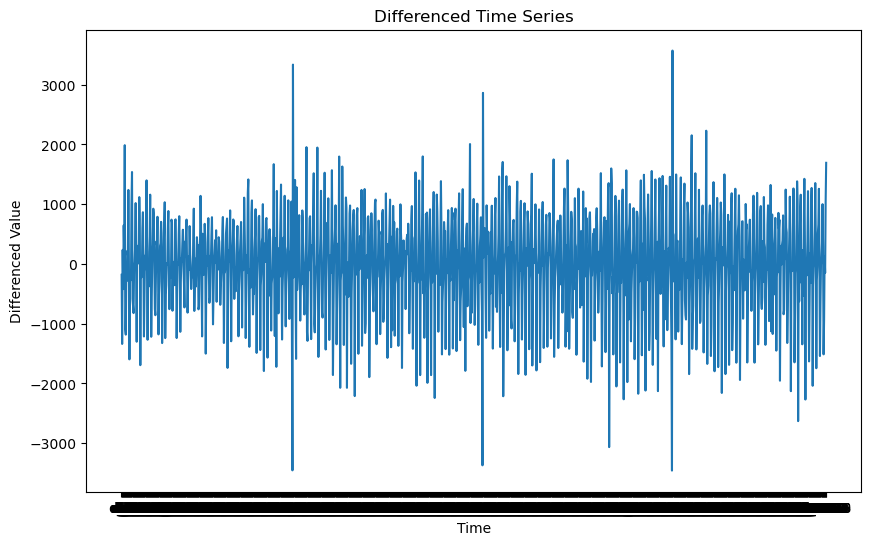

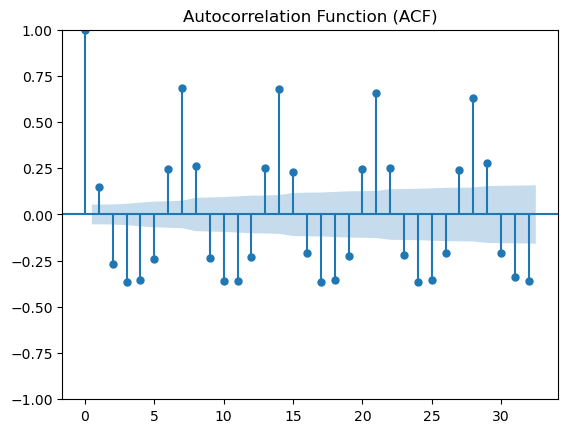

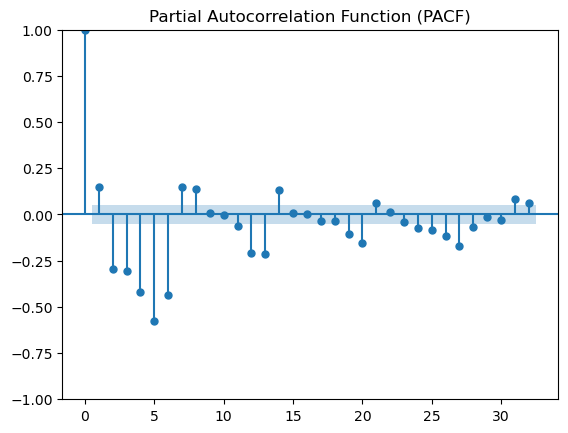

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning:

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                 1359
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10881.171
Date:                Tue, 14 Nov 2023   AIC                          21768.342
Time:                        17:23:21   BIC                          21783.984
Sample:                             0   HQIC                         21774.198
                               - 1359                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5129      0.025     20.788      0.000       0.465       0.561
ma.L1         -0.9818      0.006   -167.130      0.000      -0.993      -0.970
sigma2       5.33e+05   1.77e+04     30.044      0.0

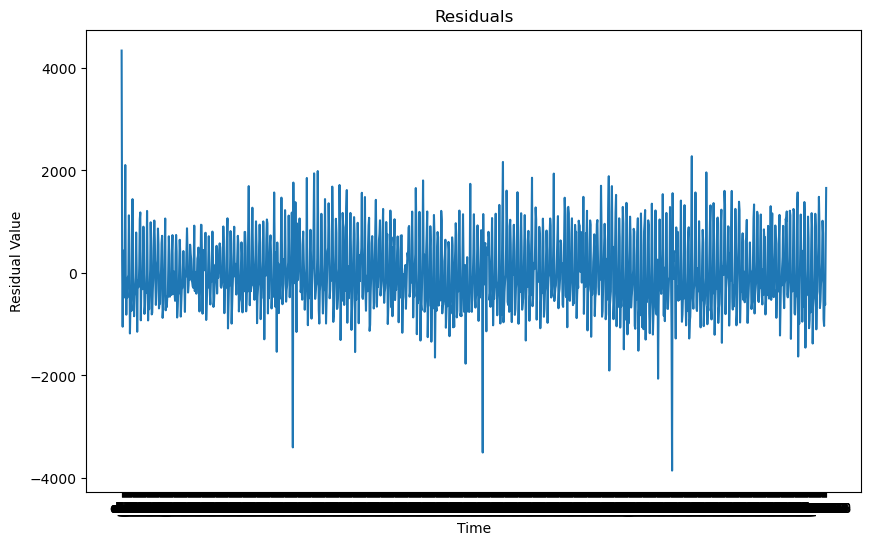

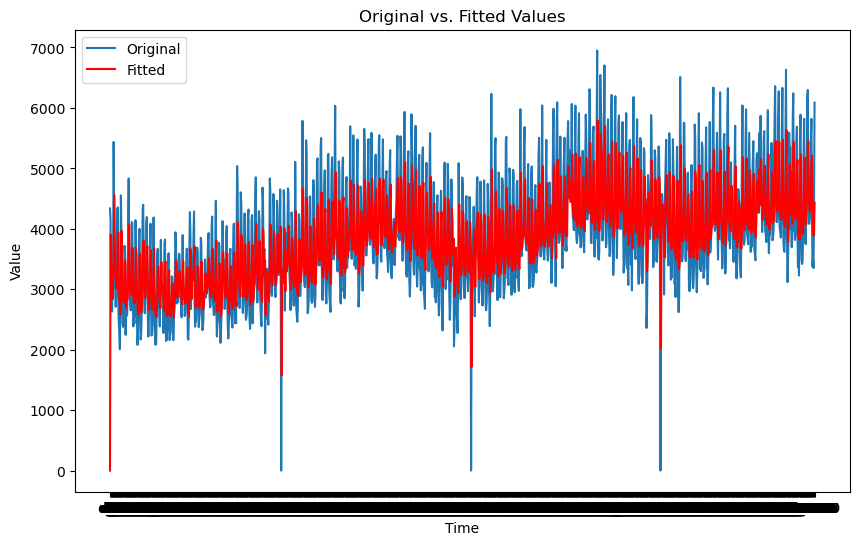

In [ ]:
# Plot the original time series
plt.figure(figsize = (10, 6))
plt.plot(train_data['Sales'])
plt.title('Original Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# Check for stationarity using ADF test
result_adf = adfuller(train_data['Sales'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:', result_adf[4])

# If the data is not stationary, apply differencing
if result_adf[1] > 0.05:
    train_data['Differenced'] = train_data['Sales'].diff().dropna()
    plt.figure(figsize = (10, 6))
    plt.plot(train_data['Differenced'])
    plt.title('Differenced Time Series')
    plt.xlabel('Time')
    plt.ylabel('Differenced Value')
    plt.show()

# Plot ACF and PACF for model order selection
plot_acf(train_data['Differenced'].dropna())
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(train_data['Differenced'].dropna())
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit ARIMA model
order = (1, 1, 1)  # Replace with the selected order based on ACF and PACF
model = ARIMA(train_data['Sales'], order = order)
results = model.fit()

# Display model summary
print(results.summary())

# Plot the residuals
plt.figure(figsize = (10, 6))
plt.plot(results.resid)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Residual Value')
plt.show()

# Plot the fitted values
plt.figure(figsize = (10, 6))
plt.plot(train_data['Sales'], label = 'Original')
plt.plot(results.fittedvalues, color = 'red', label = 'Fitted')
plt.title('Original vs. Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
#train_data['Differenced'] = train_data['Differenced'].diff().dropna()

In [ ]:
steps = len(test_data)
forecast = results.forecast(steps = steps)

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\pratyusha\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [ ]:
MSE = np.mean((results.fittedvalues - train_data['Sales'])**2)

In [ ]:
RMSE = np.sqrt(MSE)
RMSE

739.5949830899381

In [ ]:
train_data

,Day,Sales,Differenced,DoubleDifferenced
d_1,1,4337,NaN,NaN
d_2,2,4155,-182.0,NaN
d_3,3,2816,-1339.0,-1157.0
d_4,4,3051,235.0,1574.0
d_5,5,2630,-421.0,-656.0
...,...,...,...,...
d_1355,1355,3377,-928.0,585.0
d_1356,1356,3499,122.0,1050.0
d_1357,1357,3349,-150.0,-272.0
d_1358,1358,4396,1047.0,1197.0


In [ ]:
forecast

1359    5330.624399
1360    4942.191553
1361    4742.977220
1362    4640.806790
1363    4588.406963
           ...     
1935    4533.239017
1936    4533.239017
1937    4533.239017
1938    4533.239017
1939    4533.239017
Name: predicted_mean, Length: 581, dtype: float64

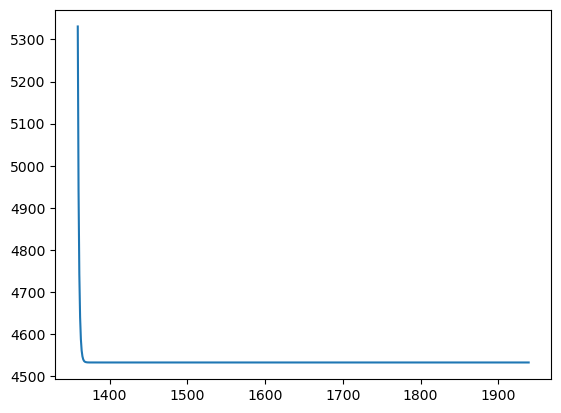

In [ ]:
plt.plot(forecast)

In [ ]:
train_dataset = sales_train_val[d_cols[-100:-30]]
val_dataset = sales_train_val[d_cols[-30:]]


In [ ]:
# Check for stationarity using ADF test
result_adf = adfuller(train_data['Differenced'].dropna())
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print('Critical Values:', result_adf[4])


ADF Statistic: -13.260627800019474
p-value: 8.412614567102188e-25
Critical Values: {'1%': -3.435265181809132, '5%': -2.8637106667875765, '10%': -2.567925669374958}
